In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### Dataset.py

In [2]:
path = r'C:\Users\hp\Desktop\Spring_22\MSCI_641\Project\FNC-1\fakenewschallenge' 

In [3]:
def file_read(path, file='train'):
    articleBody = pd.read_csv(os.path.join(path, file + '_bodies.csv'))
    stances = pd.read_csv(os.path.join(path, file + '_stances.csv'))
    return articleBody, stances

In [4]:
train_bodies, train_stances = file_read(path)
print(f'Total article bodies are : {train_bodies.shape[0]}')
print(f'Total stances are : {train_stances.shape[0]}')

Total article bodies are : 1683
Total stances are : 49972


In [20]:
train_bodies.head(5)

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...


In [21]:
train_stances.head(5)

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated
4,Spider burrowed through tourist's stomach and ...,1923,disagree


In [30]:
train_stances[train_stances['Body ID'] == 712]

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1787,Seth Rogen to Play Apple’s Steve Wozniak,712,discuss
3974,Mexico police find mass grave near site 43 stu...,712,unrelated
4936,Mexico Says Missing Students Not Found In Firs...,712,unrelated
5210,New iOS 8 bug can delete all of your iCloud do...,712,unrelated
5863,Return of the Mac: Seth Rogen in talks to star...,712,discuss
6199,Seth Rogen Is Woz,712,discuss
6756,Mexico finds 4 more graves at site of suspecte...,712,unrelated
7526,Are missing students in mass graves found near...,712,unrelated
9003,Mexico prosecutor: Students not in 1st mass gr...,712,unrelated


In [27]:
train_stances[train_stances['Body ID'] == 712]['Stance'].value_counts()

unrelated    31
discuss       8
Name: Stance, dtype: int64

In [32]:
train_bodies[train_bodies['Body ID'] == 712]

,Body ID,articleBody
475,712,Danny Boyle is directing the untitled film\r\n...


#### Train_test_split

In [44]:
train_bodies['Body ID'].isna().sum()

0

In [45]:
train_bodies['Body ID'].dtype

dtype('int64')

In [46]:
train_stances['Body ID'].dtype

dtype('int64')

In [47]:
train_stances['Body ID'].isna().sum()

0

In [5]:
train_bodies.set_index('Body ID', inplace = True)
train=train_stances.join(train_bodies['articleBody'], how = 'left', on = 'Body ID')
train

,Headline,Body ID,Stance,articleBody
0,Police find mass graves with at least '15 bodi...,712,unrelated,Danny Boyle is directing the untitled film\r\n...
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree,Hundreds of Palestinians were evacuated from t...
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated,30-year-old Moscow resident was hospitalized w...
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated,(Reuters) - A Canadian soldier was shot at the...
4,Spider burrowed through tourist's stomach and ...,1923,disagree,"Fear not arachnophobes, the story of Bunbury's..."
...,...,...,...,...
49967,Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...,1681,unrelated,(CNN) -- Boko Haram laughed off Nigeria's anno...
49968,Brian Williams slams social media for speculat...,2419,unrelated,Along with unveiling the Apple Watch earlier t...
49969,Mexico Says Missing Students Not Found In Firs...,1156,agree,The bodies found in a mass grave were confirme...
49970,US Lawmaker: Ten ISIS Fighters Have Been Appre...,1012,discuss,Rep. Duncan Hunter (R-CA) told Greta Van Suste...


In [6]:
train.isna().sum()

Headline       0
Body ID        0
Stance         0
articleBody    0
dtype: int64

In [9]:
len(train)

49972

In [8]:
train.dtypes

Headline       object
Body ID         int64
Stance         object
articleBody    object
dtype: object

In [14]:
set(train['Stance'])

{'agree', 'disagree', 'discuss', 'unrelated'}

In [20]:
train.Stance.value_counts()

unrelated    36545
discuss       8909
agree         3678
disagree       840
Name: Stance, dtype: int64

In [23]:
dict_map = {'agree':0, 'disagree':1, 'discuss':2, 'unrelated':3}
train.Stance.replace(dict_map, inplace=True)
train.Stance.value_counts()

3    36545
2     8909
0     3678
1      840
Name: Stance, dtype: int64

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'I love my dog',
    'I love my cat'
]

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5}


In [29]:
sentences = [
    'I love my dog',
    'I love my cat',
    'You love dog!'
]

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'i': 2, 'my': 3, 'dog': 4, 'cat': 5, 'you': 6}


In [31]:
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

[[2, 1, 3, 4], [2, 1, 3, 5], [6, 1, 4]]


In [32]:
test_data = [
    'You are amazing',
    'Monkey can be pet?'
]

test_sequences = tokenizer.texts_to_sequences(test_data)
print(test_sequences)

[[6], []]


In [34]:
sentences = [
    'I love my dog',
    'I love my cat',
    'You love dog!'
]

tokenizer = Tokenizer(num_words = 100, oov_token = "<OOV>") #maintains sequence of same length(oov)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'love': 2, 'i': 3, 'my': 4, 'dog': 5, 'cat': 6, 'you': 7}


In [35]:
test_sequences = tokenizer.texts_to_sequences(test_data)
print(test_sequences)

[[7, 1, 1], [1, 1, 1, 1]]


In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded = pad_sequences(sequences)
print(word_index)
print(sequences)
print(padded)

{'<OOV>': 1, 'love': 2, 'i': 3, 'my': 4, 'dog': 5, 'cat': 6, 'you': 7}
[[2, 1, 3, 4], [2, 1, 3, 5], [6, 1, 4]]
[[2 1 3 4]
 [2 1 3 5]
 [0 6 1 4]]


In [38]:
padded = pad_sequences(sequences, padding = 'post', truncating = 'post', maxlen = 5)
print(word_index)
print(sequences)
print(padded)

{'<OOV>': 1, 'love': 2, 'i': 3, 'my': 4, 'dog': 5, 'cat': 6, 'you': 7}
[[2, 1, 3, 4], [2, 1, 3, 5], [6, 1, 4]]
[[2 1 3 4 0]
 [2 1 3 5 0]
 [6 1 4 0 0]]


In [39]:
os.listdir()

['.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 'EDA_baseline_v1.ipynb',
 'Sarcasm_detection']

In [49]:
import glob
glob.glob(os.path.join(os.getcwd(), 'Sarcasm_detection/*.json'))

['C:\\Users\\hp\\Desktop\\Spring_22\\MSCI_641\\Project\\FNC-1\\FNC-1\\Sarcasm_detection\\Sarcasm_Headlines_Dataset.json',
 'C:\\Users\\hp\\Desktop\\Spring_22\\MSCI_641\\Project\\FNC-1\\FNC-1\\Sarcasm_detection\\Sarcasm_Headlines_Dataset_v2.json']

In [58]:
import json

sarcasm_file = r'C:\Users\hp\Desktop\Spring_22\MSCI_641\Project\FNC-1\FNC-1\Sarcasm_detection\Sarcasm_Headlines_Dataset.json' 
data = [json.loads(line) for line in open(sarcasm_file, 'r')]

In [59]:
data[:5]

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [62]:
sentences = []
labels  = []

for item in data:
    #print(item['headline'])
    #print(item['is_sarcastic'])
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [64]:
len(sentences), len(labels)

(26709, 26709)

In [66]:
split_idx = int(0.8 * len(sentences))
split_idx

21367

In [68]:
training_sentences = sentences[:split_idx]
testing_sentences = sentences[split_idx:]
training_labels = labels[:split_idx]
testing_labels = labels[split_idx:]

print(len(training_sentences), len(training_labels))
print(len(testing_sentences), len(testing_labels))

21367 21367
5342 5342


In [69]:
tokenizer = Tokenizer(num_words = 10000, oov_token = '<OOV>')
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding = 'post', truncating = 'post', maxlen = 100)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, padding = 'post', truncating = 'post', maxlen = 100)

In [70]:
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)


In [71]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length = 100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [73]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs,\
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
668/668 - 6s - loss: 0.6697 - accuracy: 0.5748 - val_loss: 0.6041 - val_accuracy: 0.8117 - 6s/epoch - 9ms/step
Epoch 2/30
668/668 - 2s - loss: 0.4466 - accuracy: 0.8241 - val_loss: 0.3872 - val_accuracy: 0.8405 - 2s/epoch - 3ms/step
Epoch 3/30
668/668 - 2s - loss: 0.3187 - accuracy: 0.8743 - val_loss: 0.3580 - val_accuracy: 0.8472 - 2s/epoch - 3ms/step
Epoch 4/30
668/668 - 2s - loss: 0.2683 - accuracy: 0.8954 - val_loss: 0.3435 - val_accuracy: 0.8559 - 2s/epoch - 3ms/step
Epoch 5/30
668/668 - 2s - loss: 0.2347 - accuracy: 0.9076 - val_loss: 0.3423 - val_accuracy: 0.8560 - 2s/epoch - 3ms/step
Epoch 6/30
668/668 - 2s - loss: 0.2086 - accuracy: 0.9196 - val_loss: 0.3477 - val_accuracy: 0.8536 - 2s/epoch - 3ms/step
Epoch 7/30
668/668 - 2s - loss: 0.1867 - accuracy: 0.9296 - val_loss: 0.3811 - val_accuracy: 0.8471 - 2s/epoch - 2ms/step
Epoch 8/30
668/668 - 2s - loss: 0.1692 - accuracy: 0.9379 - val_loss: 0.3705 - val_accuracy: 0.8486 - 2s/epoch - 3ms/step
Epoch 9/30
668/668 - 2s 

In [75]:
df_plot = pd.DataFrame(history.history)
df_plot

,loss,accuracy,val_loss,val_accuracy
0,0.669661,0.574765,0.604135,0.811681
1,0.446603,0.824121,0.387151,0.840509
2,0.318695,0.874292,0.358011,0.847248
3,0.268297,0.895353,0.343518,0.855859
4,0.234738,0.907568,0.342338,0.856046
5,0.208621,0.919596,0.347716,0.853613
6,0.186698,0.929611,0.381086,0.847061
7,0.169200,0.937895,0.370534,0.848559
8,0.154639,0.943885,0.399276,0.840696
9,0.141880,0.948238,0.414671,0.841820


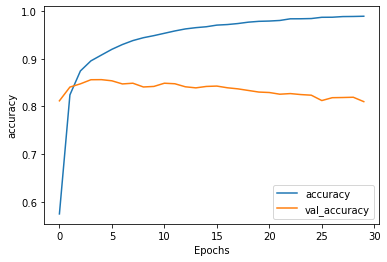

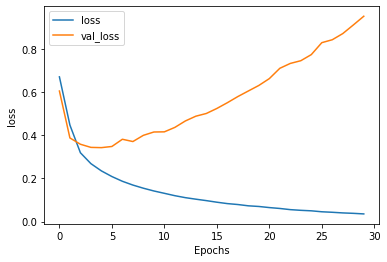

In [77]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [78]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [80]:
training_padded[0]

array([ 320,    1,  681, 3589, 2357,   46,  381, 2358,    1,    6, 2750,
       9270,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [82]:
training_sentences[2]

"mom starting to fear son's web series closest thing she will have to grandchild"

In [83]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [85]:
sentence = ["granny starting to fear spiders in the garden might be real", 
            "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')
print(model.predict(padded))

[[0.98771155]
 [0.00102419]]


In [87]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length = 100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])

In [88]:
num_epochs = 3
history_2 = model_2.fit(training_padded, training_labels, epochs=num_epochs,\
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/3
668/668 - 49s - loss: 0.4051 - accuracy: 0.8034 - val_loss: 0.3368 - val_accuracy: 0.8506 - 49s/epoch - 74ms/step
Epoch 2/3
668/668 - 39s - loss: 0.2285 - accuracy: 0.9057 - val_loss: 0.3490 - val_accuracy: 0.8529 - 39s/epoch - 58ms/step
Epoch 3/3
668/668 - 43s - loss: 0.1574 - accuracy: 0.9400 - val_loss: 0.3854 - val_accuracy: 0.8555 - 43s/epoch - 65ms/step


In [2]:
import nltk
help(nltk)

Help on package nltk:

NAME
    nltk

DESCRIPTION
    The Natural Language Toolkit (NLTK) is an open source Python library
    for Natural Language Processing.  A free online book is available.
    (If you use the library for academic research, please cite the book.)
    
    Steven Bird, Ewan Klein, and Edward Loper (2009).
    Natural Language Processing with Python.  O'Reilly Media Inc.
    https://www.nltk.org/book/
    
    isort:skip_file
    
    @version: 3.7

PACKAGE CONTENTS
    app (package)
    book
    ccg (package)
    chat (package)
    chunk (package)
    classify (package)
    cli
    cluster (package)
    collections
    collocations
    compat
    corpus (package)
    data
    decorators
    downloader
    draw (package)
    featstruct
    grammar
    help
    inference (package)
    internals
    jsontags
    lazyimport
    lm (package)
    metrics (package)
    misc (package)
    parse (package)
    probability
    sem (package)
    sentiment (package)
    stem (pa

In [3]:
!pip install pyspark


  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764027 sha256=c34546c9a8ee5b5b453ab72546df579beddd72bfc1eb6cf7e9a09d454455d2dd
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\05\75\73\81f84d174299abca38dd6a06a5b98b08ae25fce50ab8986fa1
Successfully built pyspark


In [4]:
import pyspark